In [2]:
import math
from __future__ import division
x = []
y = []

def readFile():
    global x
    global y
    f = open("hw6_spectX.txt")
    for l in f.readlines():
        temp = []
        for w in l.split():
            temp.append(int(w))
        x.append(temp)
    f = open("hw6_spectY.txt")
    for l in f.readlines():
        for w in l.split():
            y.append(int(w))

readFile()
print(len(x))
probygivenx = [0.0 for x in range(len(x))]
probzxgivenxy = [[0.0]*len(p)]*len(x)
#print(probzxgivenxy)
print(y)

267
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [3]:
def probYgivenX():
    global p
    global probygivenx
    global x
    global y
    for i in range(len(x)):
        prod = 1.0
        for j in range(len(x[i])):
            #print(p[j])
            prod = prod * (math.pow((1-p[j]),x[i][j]))
        prod = 1 - prod
        #print(prod)
        probygivenx[i] = prod
    #print(probygivenx)
#probYgivenX()

In [4]:
def probZXgivenXY():
    global probzxgivenxy
    global p
    global probygivenx
    global x
    global y
    probYgivenX()
    for i in range(len(x)):
        for j in range(len(p)):
            '''print("-----------")
            print(x[i][j])
            print(p[j])
            print(y[i])
            print(probygivenx[i])
            print("------------")'''
            probzxgivenxy[i][j] = float((float(x[i][j]*p[j]*y[i]))/float(probygivenx[i]))
            '''print(probzxgivenxy[i][j])
            print("------------")'''
    #print(probzxgivenxy)

In [5]:
def updateP():
    global p
    global probygivenx
    global x
    global y
    global probzxgivenxy
    for j in range(len(p)):
        count = 0.0
        num = 0.0
        for i in range(len(x)):
            if(x[i][j]==1):
                count += 1
            num = num + probzxgivenxy[i][j]
            #print(probzxgivenxy[i][j])
        #print(num)
        #//print(count)
        p[j] = num/count
        
    #print(p)

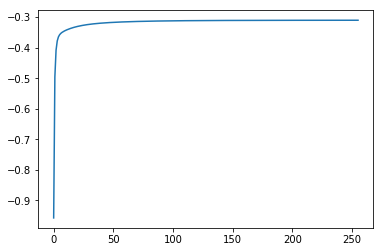

1--0.49591639407753635-56
2--0.40822081705839114-43
3--0.3779406836061008-40
4--0.3646149825001877-42
5--0.35757532996649616-44
6--0.3531842166828877-44
7--0.35002556577092486-44
8--0.3475006162087826-44
9--0.3453400990924291-44
10--0.3434159529651389-42
11--0.3416634501406622-42
12--0.34004737198005874-41
13--0.3385467585599132-39
14--0.3371478191245712-39
15--0.33584054521650464-40
16--0.33461704895854844-40
17--0.33347072395698485-40
18--0.33239580702080124-40
19--0.3313871394626801-39
20--0.3304400301620283-39
21--0.3295501719703101-39
22--0.32871358703290604-38
23--0.32792658843810424-38
24--0.3271857515339723-38
25--0.326487891275398-38
26--0.325830043534388-38
27--0.32520944914451916-38
28--0.3246235399124871-38
29--0.32406992609548135-38
30--0.3235463850039954-37
31--0.3230508504922716-37
32--0.3225814031674978-37
33--0.3221362611969939-37
34--0.321713771627242-37
35--0.32131240215379475-37
36--0.32093073329950433-37
37--0.32056745097177336-37
38--0.32022133937891256-37
39--0.3

In [7]:
import math
p = [0.05 for x in range(23)]
probygivenx = [0.0 for x in range(len(x))]
probzxgivenxy = [[0.0]*len(p) for y in range(len(x))]
probZXgivenXY()
logl = 0
for i in range(len(x)):
        if(y[i]==1):
            logl += math.log(probygivenx[i])
        if(y[i]==0):
            logl += math.log(1.0-probygivenx[i])
plotX = []
plotY = []
mistakes = []
plotX.append(0)
plotY.append(logl/len(x))

for i in range(1, 256):
    #probYgivenX()
    updateP()
    probZXgivenXY()
    #probYgivenX()
    plotX.append(i)
    #print(i)
    logll = 0.0
    mistakeCount = 0
    for i in range(len(x)):
        if(y[i]==1):
            if(probygivenx[i]<=0.5):
                mistakeCount += 1
            logll += math.log(probygivenx[i])
        if(y[i]==0):
            if(probygivenx[i]>=0.5):
                mistakeCount += 1
            logll += math.log(1-probygivenx[i])
    logll = logll/len(x)
    plotY.append(logll)
    mistakes.append(mistakeCount)
    #print(logll)

import matplotlib.pyplot as plt

plt.plot(plotX, plotY)
plt.show()

#print(plotX)
#print(plotY)
#print(mistakes)

for i in range(1, len(plotX)):
    print(str(plotX[i]) + "-" + str(plotY[i]) + "-" + str(mistakes[i-1]))